<a href="https://colab.research.google.com/github/BharathKumar8202/Machine-Learning-Projects/blob/main/CrimeAgainstWomen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_crime=pd.read_csv('CrimesOnWomenData.csv')
df_desc=pd.read_csv('description.csv')

In [ ]:
df_crime.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [ ]:
df_desc.head()

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths


In [ ]:
def preprocess(df_crime):
 df_crime['Year'] = pd.to_datetime(df_crime['Year'], format='%Y').dt.year
 df_crime = df_crime.iloc[: , 1:]
 df_crime['total_crime'] = df_crime.iloc[:, 2:].sum(axis=1)
 return df_crime

In [ ]:
df=preprocess(df_crime)
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,total_crime
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180
2,ASSAM,2001,817,1070,59,850,4,1248,0,4048
3,BIHAR,2001,888,518,859,562,21,1558,83,4489
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964


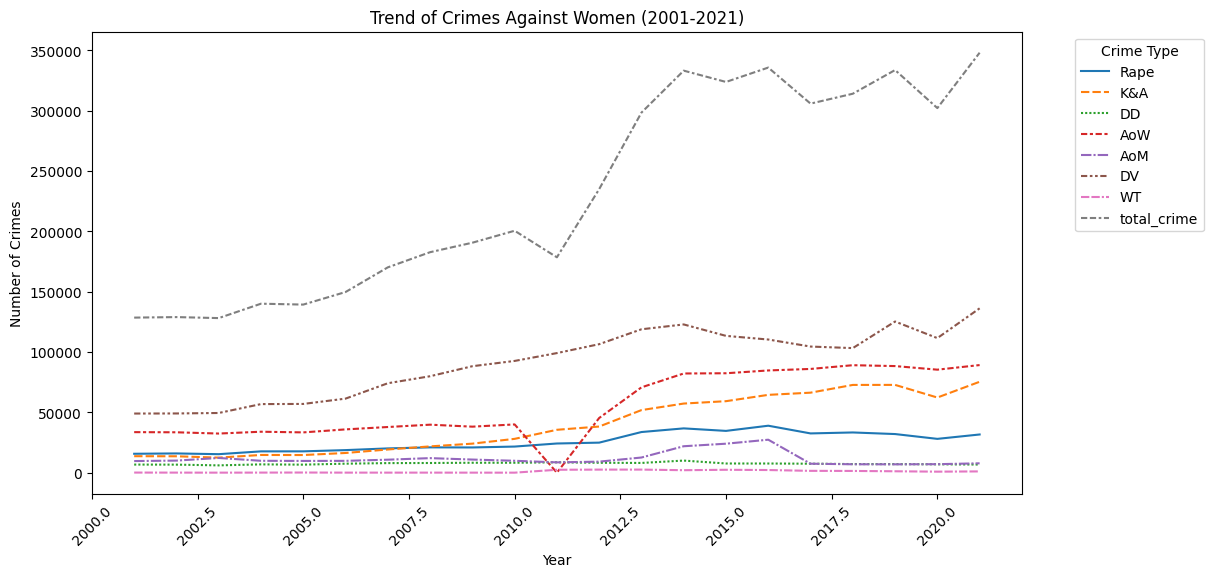

In [ ]:
crime_trend = df.groupby('Year').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

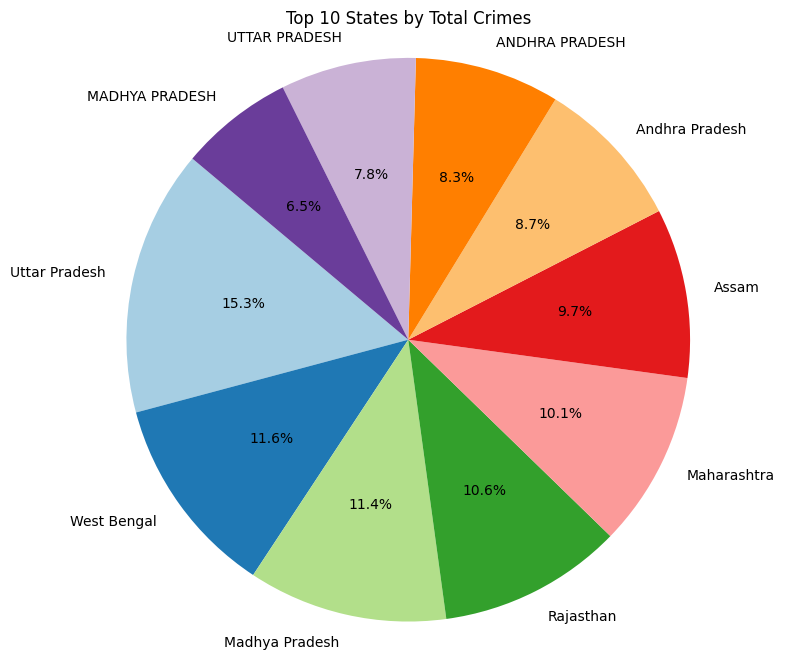

In [ ]:
# Group by state and calculate total crime
crime_by_state = df.groupby('State')['total_crime'].sum()

top_10_states = crime_by_state.sort_values(ascending=False).head(10)

# Pie chart for top 10 states
plt.figure(figsize=(8, 8))
plt.pie(top_10_states.values, labels=top_10_states.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 States by Total Crimes')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


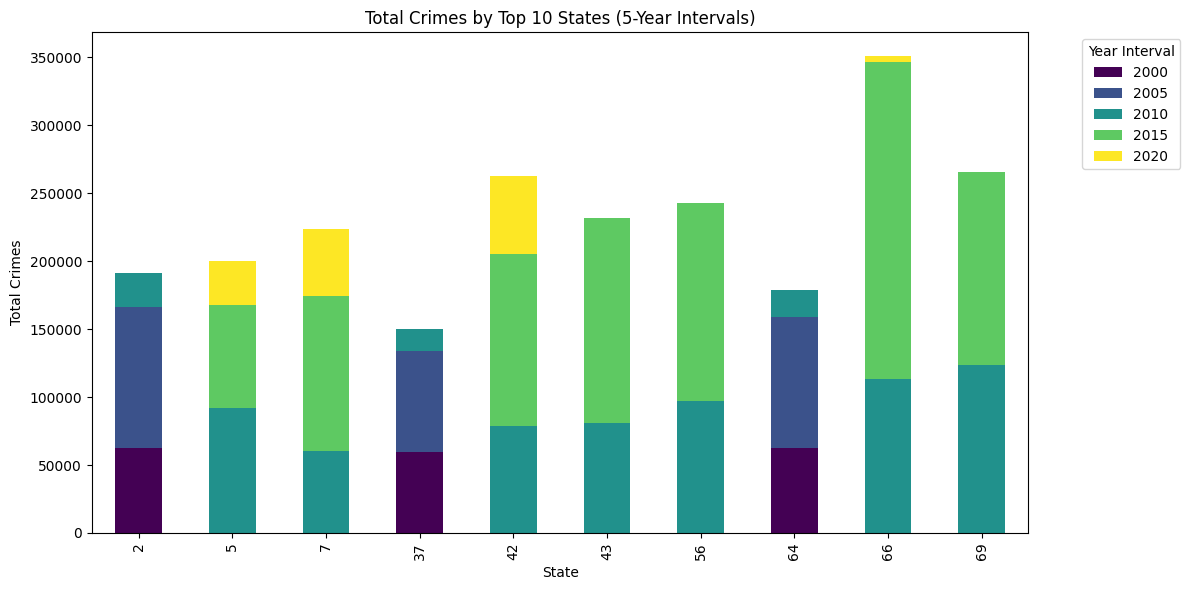

In [ ]:
# Group by state and calculate the total crime across all years
total_crime_by_state = df.groupby('State')['total_crime'].sum()

# Get the top 10 states by total crime
top_10_states = total_crime_by_state.sort_values(ascending=False).head(10).index

# Filter the data for only the top 10 states
top_10_data = df[df['State'].isin(top_10_states)]

# Group by state and 5-year intervals, then calculate total crime
crime_top_10 = top_10_data.groupby(['State', 'Year_Interval'])['total_crime'].sum().unstack()

# Bar plot for top 10 states
crime_top_10.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Top 10 States (5-Year Intervals)')
plt.legend(title='Year Interval', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


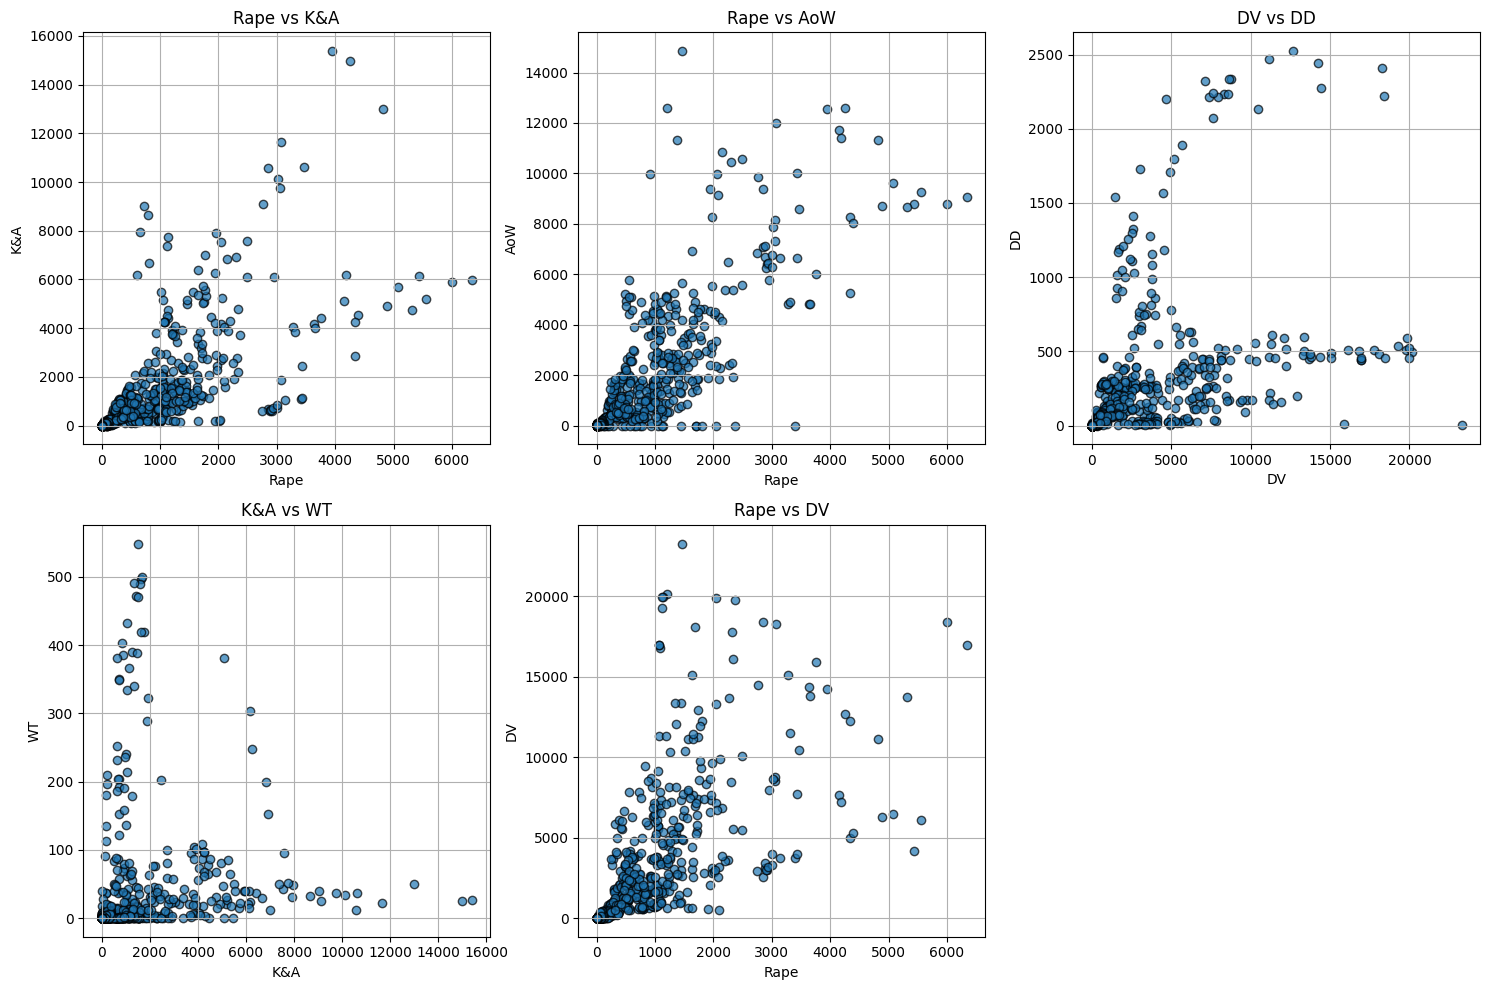

In [ ]:
scatter_pairs = [
    ('Rape', 'K&A'),
    ('Rape', 'AoW'),
    ('DV', 'DD'),
    ('K&A', 'WT'),
    ('Rape','DV')
]

# Set up the subplots
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, (x_col, y_col) in enumerate(scatter_pairs, start=1):
    plt.subplot(2, 3, i)  # Arrange plots in 2 rows and 3 columns
    plt.scatter(df[x_col], df[y_col], alpha=0.7, edgecolors='k')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{x_col} vs {y_col}')
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["State"] = label_encoder.fit_transform(df["State"])

In [ ]:
df.corr()['Rape']

,Rape
State,0.147267
Year,0.173887
Rape,1.000000
K&A,0.700730
DD,0.553497
AoW,0.804336
AoM,0.458025
DV,0.680321
WT,0.219218
total_crime,0.853256


In [ ]:
X = df.drop(columns=['Rape'])  # Drop the target column
y = df['Rape']  # The target column

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale the features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
mae_log_reg = mean_absolute_error(y_test, y_pred_log_reg)
mse_log_reg = mean_squared_error(y_test, y_pred_log_reg)
r2_log_reg = r2_score(y_test, y_pred_log_reg)

print("Logistic Regression Performance:")
print(f"Mean Absolute Error: {mae_log_reg}")
print(f"Mean Squared Error: {mse_log_reg}")
print(f"R2 Score: {r2_log_reg}")

Logistic Regression Performance:
Mean Absolute Error: 251.86486486486487
Mean Squared Error: 181977.05405405405
R2 Score: 0.6468557932534293


In [ ]:
# Initialize Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R2 Score: {r2_rf}")


Random Forest Regressor Performance:
Mean Absolute Error: 106.34790540540541
Mean Squared Error: 72194.85365878377
R2 Score: 0.8598988512093237


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xg = xg_reg.predict(X_test)

# Evaluate the model
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print("\nXGBoost Regressor Performance:")
print(f"Mean Absolute Error: {mae_xg}")
print(f"Mean Squared Error: {mse_xg}")
print(f"R2 Score: {r2_xg}")



XGBoost Regressor Performance:
Mean Absolute Error: 100.58666229248047
Mean Squared Error: 53541.48046875
R2 Score: 0.8960975408554077
